# Tâche 2 - Comme le disait le proverbe - les bons mots pour le dire

L'objectif de cette tâche est de compléter des proverbes à l'aide de modèles de langue N-grammes en insérant des mots aux bons endroits dans un texte masqué. Il s'agit d'une tâche de type *cloze test* qui consiste à choisir le meilleur mot à insérer dans un texte en fonction de son contexte. 

Voir l'énoncé du travail #1 pour une description plus détaillée de cette tâche. 

Fichiers:
- *proverbes.txt*: il contient plus de 3000 proverbes, un par ligne de texte. Pour l'entraînement des modèles de langues N-grammes. 
- *test_proverbes_v1.json*: il contient des proverbes masqués, les mots à insérer et la bonne formulation du proverbe. À utiliser pour évaluer la capacité des modèles à mettre les mots aux bons endroits. 

Consignes: 
- Utilisez NLTK pour construire les modèles de langue.
- Utilisez des expressions régulières (une seule ou plusieurs) pour remplacer les * et les ** par des mots. 
- Utilisez NLTK pour faire la tokenisation des proverbes. 
- N'oubliez pas de faire le *padding* des proverbes avec des symboles de début \<BOS\> et de fin \<EOS\>.
- Ne pas modifier les fonctions *load_proverbs* et *load_tests*.
- Ne pas modifier la signature de la fonction *replace_stars_with_words*.
- Utilisez la variable *models* pour conserver les modèles après entraînement. 
- Ne pas modifier la signature de la fonction *train_models*.
- Ne pas modifier la signature de la fonction *fill_masked_proverb*. 
- Des modifications aux signatures pourraient entraîner des déductions dans la correction. 
- Vous pouvez ajouter des cellules au notebook et toutes les fonctions utilitaires que vous voulez. 

## Section 1 - Lecture des fichiers de données (proverbes et tests)

In [52]:
import json

# Ne pas modifier le chemin de ces 2 fichiers pour faciliter notre correction
proverbs_fn = "./data/proverbes.txt"    
test_v1_fn = './data/test_proverbes_v1.json'

def load_proverbs(filename):
    with open(filename, 'r', encoding='utf-8') as f:
        raw_lines = f.readlines()
    return [x.strip() for x in raw_lines]


def load_tests(filename):
    with open(filename, 'r', encoding='utf-8') as fp:
        test_data = json.load(fp)
    return test_data

In [53]:
proverbs = load_proverbs(proverbs_fn)

In [54]:
print("Nombre de proverbes pour l'entraînement: {}".format(len(proverbs)))
print("Un exemple de proverbe: " + proverbs[5])

Nombre de proverbes pour l'entraînement: 3108
Un exemple de proverbe: accord vaut mieux qu’argent


In [55]:
tests = load_tests(test_v1_fn)

In [56]:
import pandas as pd

def get_dataframe(test_proverbs):
    return pd.DataFrame.from_dict(test_proverbs, orient='columns', dtype=None, columns=None)

df = get_dataframe(tests)
df

,Masked,Word_list,Proverb
0,a beau * qui ** de loin,"[vient, mentir]",a beau mentir qui vient de loin
1,a * mentir qui vient de **,"[beau, loin]",a beau mentir qui vient de loin
2,l’* fait le **,"[larron, occasion]",l’occasion fait le larron
3,"*-toi, le ciel t’**","[aidera, aide]","aide-toi, le ciel t’aidera"
4,"année de *, ** de blé","[année, gelée]","année de gelée, année de blé"
5,"après la *, le ** temps","[beau, pluie]","après la pluie, le beau temps"
6,"aux échecs, les * sont les plus près des **","[fous, rois]","aux échecs, les fous sont les plus près des rois"
7,"ce que * veut, ** le veut","[femme, dieu]","ce que femme veut, dieu le veut"
8,bien mal * ne ** jamais,"[profite, acquis]",bien mal acquis ne profite jamais
9,bon * ne querelle pas ses **,"[outils, ouvrier]",bon ouvrier ne querelle pas ses outils


## Section 2 - Code pour substituer les masques (étoiles) par des mots

Expliquez ici comment vous procédez pour remplacer les étoiles des proverbes masqués par des mots... N'oubliez pas qu'il faut faire usage d'expressions régulières (une ou plusieurs - au choix). 



In [57]:
import re

def replace_stars_with_words(masked, word1, word2):
    """Remplace les * par word1 et word2 dans cet ordre. Retourne le proverbe complet.."""
    # votre code
    proverb = re.sub(r"\*\*", word2, masked)
    proverb = re.sub(r"\*", word1, proverb)
    return proverb  # Retourne le proverbe avec des mots à la place des étoiles

## Section 3 - Construction des modèles de langue N-grammes. 

La fonction ***train_models*** prend en entrée une liste de proverbes et construit les trois modèles unigramme, bigramme et trigramme.

Les 3 modèles entraînés sont conservés dans *models*, un dictionnaire Python qui prend la forme 

<pre>
{
   1: modele_unigramme, 
   2: modele_bigramme, 
   3: modele_trigramme
}
</pre>

avec comme clé la valeur N du modèle et comme valeur le modèle construit par NLTK.

Expliquez ici comment vous procéder pour construire vos modèles avec NLTK, pour obtenir les n-grammes de mots, pour déterminer le vocabulaire, etc...



In [58]:
import nltk
from nltk.util import ngrams, pad_sequence
from nltk import word_tokenize
from nltk.lm.models import Laplace
from nltk import word_tokenize, bigrams, trigrams


# autres librairies à importer pour la partie sur les N-grammes?

BOS = '<BOS>'  # Jeton de début de proverbe
EOS = '<EOS>'  # Jeton de fin de proverbe


In [59]:
def build_vocabulary(text_list):
    all_unigrams = list()
    for sentence in text_list:
        word_list = word_tokenize(sentence.lower())
        all_unigrams = all_unigrams + word_list
    voc = set(all_unigrams)
    voc.add(BOS)
    voc.add(EOS)
    return list(voc)


In [60]:

def get_ngrams(text_list, n=2):
    all_ngrams = list()
    for sentence in text_list:
        tokens = word_tokenize(sentence.lower())
        padded_sent = list(pad_sequence(tokens, pad_left=True, left_pad_symbol=BOS, pad_right=True, right_pad_symbol=EOS, n=n))
        all_ngrams = all_ngrams + list(ngrams(padded_sent, n=n))      
    return all_ngrams

In [61]:
def train_models(proverbs):
    """ Vous ajoutez à partir d'ici le code dont vous avez besoin
        pour construire les différents modèles N-grammes.
        Cette fonction doit construire tous les modèles en une seule passe.
        Voir les consignes de l'énoncé du travail pratique concernant les modèles à entraîner.

        Vous pouvez ajouter les fonctions/méthodes et variables que vous jugerez nécessaire.
        Merci de ne pas modifier la signature et le comportement de cette fonction (nom, arguments, sauvegarde des modèles).
    """

    # Votre code à partir d'ici...  
    vocabulary = build_vocabulary(proverbs)
    
    unigram = get_ngrams(proverbs, n=1)
    bigram = get_ngrams(proverbs, n=2)
    trigram = get_ngrams(proverbs, n=3)
    #print(bigram)

    model1 = Laplace(1)
    model1.fit([unigram], vocabulary_text=vocabulary)
    
    model2 = Laplace(2)
    model2.fit([bigram], vocabulary_text=vocabulary)
    
    model3 = Laplace(3)
    model3.fit([trigram], vocabulary_text=vocabulary)

    
    # Sauvegarde de vos modèles 
    models = {
        1: model1,
        2: model2,
        3: model3
    }
    return models
    

In [62]:
models = train_models(proverbs)  # les modèles entraînés - [1: modele_unigramme, 2: modele_bigramme, 3: modele_trigramme] 

## Section 4 - Compléter un proverbe

New code

In [63]:
from itertools import permutations

def fill_masked_proverb(masked, word_list, n=3, criteria="perplexity"):
    """ Fonction qui complète un texte à trous (des mots masqués) en ajoutant 
           les bons mots aux bons endroits (un "cloze test").

          Le paramètre criteria indique la mesure qu'on utilise 
          pour choisir le mot le plus approprié: "logprob" ou "perplexity".
          On retourne l'estimation de cette mesure sur le proverbe complet,
          c.-à-d. en utilisant tous les mots du proverbe.

          Le paramètre n désigne le modèle utilisé.
          1 - unigramme NLTK, 2 - bigramme NLTK, 3 - trigramme NLTK
        
          Cette fonction retourne la solution (le proverbe complété) et 
         la valeur de logprob ou perplexité (selon le paramètre en entrée de la fonction). 
    """
    
    try:
        firstPartIndex = masked.split().index('*')
    except:
        firstPartIndex = re.split(r'(\*)', masked).index('*')

    
    # Tokenize the masked proverb
    proverb_tokens = nltk.word_tokenize(masked)

    # Create the N-gram model based on the specified 'n'
    ngram_model = models[n]

    # Initialize variables to store the best result and score
    best_result = ""
    best_score = float('inf') if criteria == "perplexity" else float('-inf')

    # Generate all possible word permutations (4 combinations)
    word_permutations = list(permutations(word_list, 2))

    # Iterate through each word permutation
    for word1, word2 in word_permutations:
        # Replace the '*' in the proverb with the current words
        current_result = replace_stars_with_words(masked, word1, word2)
        completed_proverb = replace_stars_with_words(masked, word1, word2)
        
        
        # Calculate logprob or perplexity based on the chosen criteria
        if criteria == "perplexity":
            completed_proverb = get_ngrams([completed_proverb], n)
            score = ngram_model.perplexity(completed_proverb)

        else:
            first_part = completed_proverb.split()[:firstPartIndex + 1]
            second_part = ' '.join(completed_proverb.split()[firstPartIndex + 1:])
            score = ngram_model.logscore(second_part, first_part)
            #score = ngram_model.logscore(nltk.word_tokenize(completed_proverb))


        # Update the best result and score if the current score is better
        if (criteria == "perplexity" and score < best_score) or (criteria == "logprob" and score > best_score):
            best_score = score
            best_result = current_result

    return best_result, best_score

Un exemple pour illustrer l'utilisation de cette fonction

In [64]:
masked =  "ami de * est bien **"   
word_list = [ 'variable','table']    
fill_masked_proverb(masked, word_list, n=3, criteria="perplexity")

('ami de table est bien variable', 2083.322542380098)

## Section 5 - Expérimentations et analyse de vos résultats

Décrivez ici les résultats obtenus et présentez l'évaluation obtenue sur le fichier de test. Vous pouvez ajouter le nombre de cellules que vous souhaitez. 

Resultats pour 1-Gram (perplex et logprob) 

In [65]:
perplex_score = 0
logprob_score = 0
for test in tests:
    result_perplex = fill_masked_proverb(test['Masked'], test['Word_list'], n=1, criteria="perplexity")
    result_logprob = fill_masked_proverb(test['Masked'], test['Word_list'], n=1, criteria="logprob")
    
    if (result_perplex[0] == test['Proverb']):
        perplex_score += 1
    if (result_logprob[0] == test['Proverb']):
        logprob_score += 1

Resultats pour 2-Gram (perplex et logprob)

In [66]:
perplex_score_2 = 0
logprob_score_2 = 0
for test in tests:
    result_perplex = fill_masked_proverb(test['Masked'], test['Word_list'], n=2, criteria="perplexity")
    result_logprob = fill_masked_proverb(test['Masked'], test['Word_list'], n=2, criteria="logprob")
    
    if (result_perplex[0] == test['Proverb']):
        perplex_score_2 += 1
    if (result_logprob[0] == test['Proverb']):
        logprob_score_2 += 1

Resultats pour 3-Gram (perplex et logprob)

In [67]:
perplex_score_3 = 0
logprob_score_3 = 0
for test in tests:
    result_perplex = fill_masked_proverb(test['Masked'], test['Word_list'], n=3, criteria="perplexity")
    result_logprob = fill_masked_proverb(test['Masked'], test['Word_list'], n=3, criteria="logprob")
    
    if (result_perplex[0] == test['Proverb']):
        perplex_score_3 += 1
    if (result_logprob[0] == test['Proverb']):
        logprob_score_3 += 1

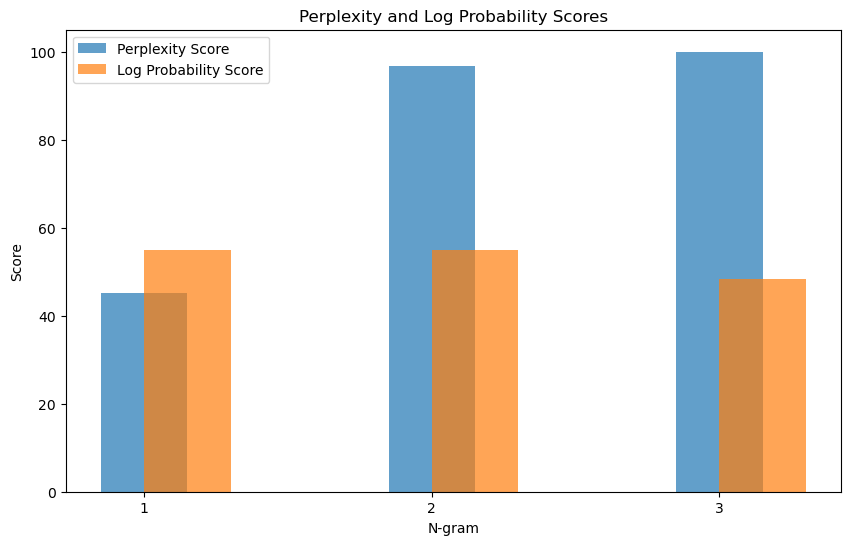

In [68]:
import matplotlib.pyplot as plt

# Define the test cases and scores
n_values = [1, 2, 3]
perplex_scores = [(perplex_score/len(tests)) *100 , (perplex_score_2/len(tests)) *100 , (perplex_score_3/len(tests))*100 ]
logprob_scores = [(logprob_score/len(tests)) *100, (logprob_score_2/len(tests)) *100 , (logprob_score_3/len(tests)) *100 ]

# Create a bar chart for perplexity scores
plt.figure(figsize=(10, 6))
plt.bar(n_values, perplex_scores, width=0.3, label='Perplexity Score', align='center', alpha=0.7)
plt.bar(n_values, logprob_scores, width=0.3, label='Log Probability Score', align='edge', alpha=0.7)

# Add labels and legend
plt.xlabel('N-gram')
plt.ylabel('Score')
plt.title('Perplexity and Log Probability Scores')
plt.xticks(n_values)
plt.legend()

# Show the chart
plt.show()


Interpretation

On remarque avec le graphique ci-dessus que le modele trigramme est naturellement celui qui fonctionne le mieux pour predire les proverbes. Cependant la methode d'evaluation joue beaucoup sur la performace du modele. Pour ce contexte, il est claire que la perplexite donne de meilleurs resultats que le logprob

## Section 6 - Partie réservée pour faire nos tests lors de la correction

Merci de ne pas modifier ni retirer cette section du notebook ! 